In [1]:
import pandas as pd
import sys
import os
import numpy as np

# añadir carpeta padre al path
sys.path.append(os.path.abspath(".."))

from factorial_analisis import analisis_factorial_por_etapa, pruebas_no_parametricas, asignar_etapa



In [5]:
PATH = '../../datos/datos_por_estacion/CENTRO.xlsx'

In [6]:
df_2021 = pd.read_excel(PATH, sheet_name='2021')
df_2022 = pd.read_excel(PATH, sheet_name='2022')
df_2023 = pd.read_excel(PATH, sheet_name='2023')
df_2024 = pd.read_excel(PATH, sheet_name='2024')

df = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [155]:
df

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,WDV
0,2021-01-01 00:00:00,4.95,NaN,NaN,NaN,22.0,68.0,64.10,NaN,NaN,64.0,3.2,0.000,9.05,3.7,336.0,NaN
1,2021-01-01 01:00:00,4.73,NaN,NaN,NaN,27.0,68.0,46.00,709.7,0.0,67.0,3.3,0.167,8.26,7.9,78.0,NaN
2,2021-01-01 02:00:00,4.72,NaN,NaN,NaN,23.0,55.0,47.64,710.1,0.0,70.0,3.3,0.165,7.15,4.8,47.0,NaN
3,2021-01-01 03:00:00,4.82,15.8,15.8,NaN,25.0,57.0,52.07,710.4,0.0,73.0,3.6,0.164,6.20,5.2,349.0,NaN
4,2021-01-01 04:00:00,5.02,NaN,NaN,NaN,25.0,65.0,61.62,710.6,0.0,74.0,3.5,0.164,5.64,3.2,358.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31384,2024-07-31 19:00:00,0.60,2.5,6.4,9.2,28.0,77.0,32.42,710.7,0.0,47.0,2.7,0.075,30.87,16.0,NaN,111.0
31385,2024-07-31 20:00:00,0.57,2.3,6.7,9.2,23.0,89.0,31.45,710.8,0.0,49.0,2.7,0.010,29.39,16.3,NaN,131.0
31386,2024-07-31 21:00:00,0.59,1.9,6.0,8.2,23.0,90.0,31.75,711.2,0.0,50.0,2.7,0.001,28.62,15.9,NaN,127.0
31387,2024-07-31 22:00:00,0.57,1.9,5.9,8.0,22.0,85.0,33.73,711.7,0.0,50.0,2.7,0.001,28.00,11.5,NaN,118.0


In [7]:
columns = ['CO', 'PM10', 'PM2.5', 'SO2', 'NO2', 'O3', 'date']

df = df[columns]

In [8]:
inicio_construccion = pd.to_datetime('2022-08-30')
inicio_construccion

Timestamp('2022-08-30 00:00:00')

In [139]:
df

,CO,PM10,PM2.5,SO2,NO2,O3
0,4.95,68.0,64.10,3.2,NaN,22.0
1,4.73,68.0,46.00,3.3,NaN,27.0
2,4.72,55.0,47.64,3.3,NaN,23.0
3,4.82,57.0,52.07,3.6,15.8,25.0
4,5.02,65.0,61.62,3.5,NaN,25.0
...,...,...,...,...,...,...
31384,0.60,77.0,32.42,2.7,6.4,28.0
31385,0.57,89.0,31.45,2.7,6.7,23.0
31386,0.59,90.0,31.75,2.7,6.0,23.0
31387,0.57,85.0,33.73,2.7,5.9,22.0


In [9]:
df["fecha"] = df["date"]

In [158]:
df

,CO,PM10,PM2.5,SO2,NO2,O3,date,fecha
0,4.95,68.0,64.10,3.2,NaN,22.0,2021-01-01 00:00:00,2021-01-01 00:00:00
1,4.73,68.0,46.00,3.3,NaN,27.0,2021-01-01 01:00:00,2021-01-01 01:00:00
2,4.72,55.0,47.64,3.3,NaN,23.0,2021-01-01 02:00:00,2021-01-01 02:00:00
3,4.82,57.0,52.07,3.6,15.8,25.0,2021-01-01 03:00:00,2021-01-01 03:00:00
4,5.02,65.0,61.62,3.5,NaN,25.0,2021-01-01 04:00:00,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...
31384,0.60,77.0,32.42,2.7,6.4,28.0,2024-07-31 19:00:00,2024-07-31 19:00:00
31385,0.57,89.0,31.45,2.7,6.7,23.0,2024-07-31 20:00:00,2024-07-31 20:00:00
31386,0.59,90.0,31.75,2.7,6.0,23.0,2024-07-31 21:00:00,2024-07-31 21:00:00
31387,0.57,85.0,33.73,2.7,5.9,22.0,2024-07-31 22:00:00,2024-07-31 22:00:00


In [10]:
df = asignar_etapa(df)

In [11]:
df

,CO,PM10,PM2.5,SO2,NO2,O3,date,fecha,etapa
0,4.95,68.0,64.10,3.2,NaN,22.0,2021-01-01 00:00:00,2021-01-01 00:00:00,0
1,4.73,68.0,46.00,3.3,NaN,27.0,2021-01-01 01:00:00,2021-01-01 01:00:00,0
2,4.72,55.0,47.64,3.3,NaN,23.0,2021-01-01 02:00:00,2021-01-01 02:00:00,0
3,4.82,57.0,52.07,3.6,15.8,25.0,2021-01-01 03:00:00,2021-01-01 03:00:00,0
4,5.02,65.0,61.62,3.5,NaN,25.0,2021-01-01 04:00:00,2021-01-01 04:00:00,0
...,...,...,...,...,...,...,...,...,...
31384,0.60,77.0,32.42,2.7,6.4,28.0,2024-07-31 19:00:00,2024-07-31 19:00:00,2
31385,0.57,89.0,31.45,2.7,6.7,23.0,2024-07-31 20:00:00,2024-07-31 20:00:00,2
31386,0.59,90.0,31.75,2.7,6.0,23.0,2024-07-31 21:00:00,2024-07-31 21:00:00,2
31387,0.57,85.0,33.73,2.7,5.9,22.0,2024-07-31 22:00:00,2024-07-31 22:00:00,2


In [12]:
resultados = pruebas_no_parametricas(df, columns, tipo='independiente')

In [13]:
resultados

,Contaminante,Comparacion,Estadistico,p-valor
0,CO,0 vs 1,122187802.5,0.000000e+00
1,CO,0 vs 2,29037782.5,1.605284e-32
2,CO,1 vs 2,20326038.5,4.823706e-43
3,PM10,0 vs 1,97250411.5,2.211915e-32
4,PM10,0 vs 2,24927689.0,6.588725e-07
5,PM10,1 vs 2,20622909.5,5.805951e-34
6,PM2.5,0 vs 1,72033091.0,7.174969e-07
7,PM2.5,0 vs 2,16791406.5,2.308800e-02
8,PM2.5,1 vs 2,14650885.0,7.113228e-01
9,SO2,0 vs 1,100451819.0,0.000000e+00



=== Etapa 0 ===
Chi-cuadrado Bartlett: 11518.67, p-valor: 0.000
KMO global: 0.624
=> Datos adecuados para análisis factorial
Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


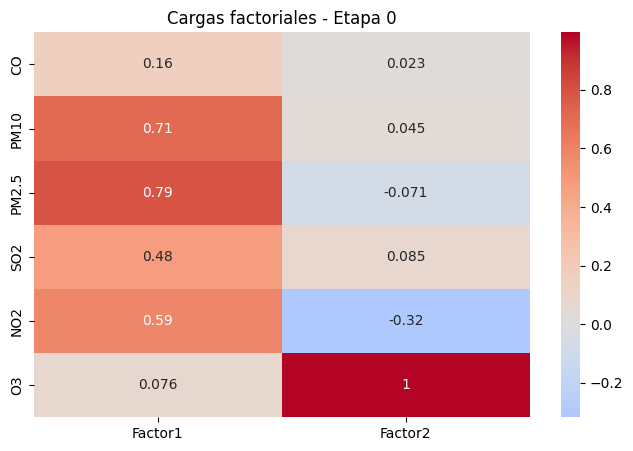


=== Etapa 1 ===
Chi-cuadrado Bartlett: 18983.17, p-valor: 0.000
KMO global: 0.709
=> Datos adecuados para análisis factorial
Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


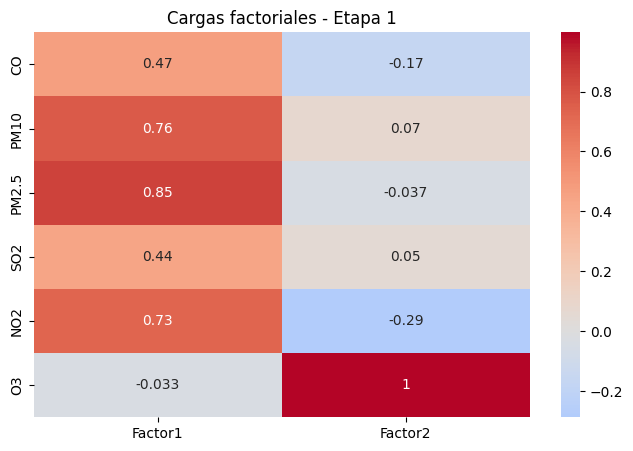


=== Etapa 2 ===
Chi-cuadrado Bartlett: 4852.04, p-valor: 0.000
KMO global: 0.673
=> Datos adecuados para análisis factorial


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


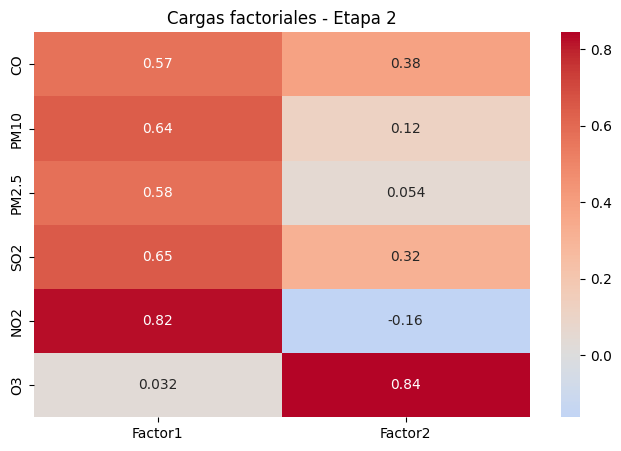

In [14]:
contaminantes = ['CO', 'PM10', 'PM2.5', 'SO2', 'NO2', 'O3']

# Supongamos df ya tiene columna 'etapa' creada~
resultados_fa = analisis_factorial_por_etapa(df, variables=contaminantes)
